In [10]:
# import libraries
import os
import matplotlib.pyplot as plt
import parangonar as pa
import partitura as pt
from pathlib import Path
from partitura.io.exportmatch import matchfile_from_alignment, save_match;
from config import SCORE_PATH, PERFORMANCE_PATH, MOZART_VARIATION_FILES

In [2]:
score = pt.load_score(filename=SCORE_PATH)  # xml file
performance = pt.load_performance_midi(filename=PERFORMANCE_PATH)

In [3]:
# sometimes the scores contain multiple parts which are best merged for easier processing
part = pt.score.merge_parts(score)
# sometimes scores contain repeats that need to unfolded to make the alignment make sense
unfolded_part = pt.score.unfold_part_maximal(part)

In [4]:
score_array = unfolded_part.note_array(include_grace_notes=True)
performance_array = performance.note_array()

In [5]:
matcher = pa.DualDTWNoteMatcher()
pred_alignment = matcher(score_array, 
                        performance_array,
                        process_ornaments=True,
                        score_part=unfolded_part) # if a score part is passed, ornaments can be handled seperately

In [6]:
save_match(
    alignment=pred_alignment,
    performance_data=performance,
    score_data=unfolded_part,
    out='./test.match',
    assume_unfolded=True,
)

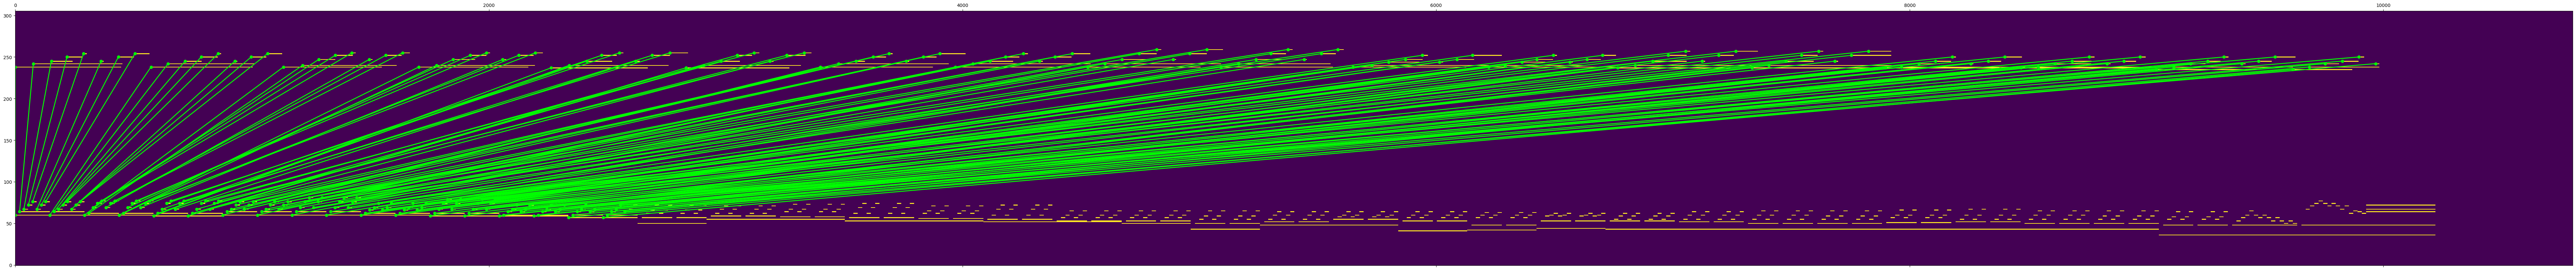

In [7]:
pa.plot_alignment(performance_array,
                score_array,
                pred_alignment,
                save_file = False)

In [8]:
# Run with test data

from partitura import load_score
from partitura.io.importmatch import load_match


score_fn = MOZART_VARIATION_FILES["musicxml"]

score = load_score(score_fn)
match_fn = MOZART_VARIATION_FILES["match"]
performance, alignment = load_match(match_fn)
pna1 = performance.note_array()

output_path = './test.match'
save_match(
    alignment = alignment,
    performance_data = performance,
    score_data = score,
    out = output_path,
    assume_unfolded = True
)

In [9]:
## beat_period, velocity, timing, articulation_log
performance_codecs, _ = pt.musicanalysis.encode_performance(unfolded_part, performance, pred_alignment)